In [ ]:
# K-Means Clustering

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/Mall_Customers.csv'
dataset= pd.read_csv(url,sep=',')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape

(200, 5)

In [ ]:
#Generamos nuestra x
X = dataset.iloc[:, [3, 4]].values

Nos quedamos con las variables 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

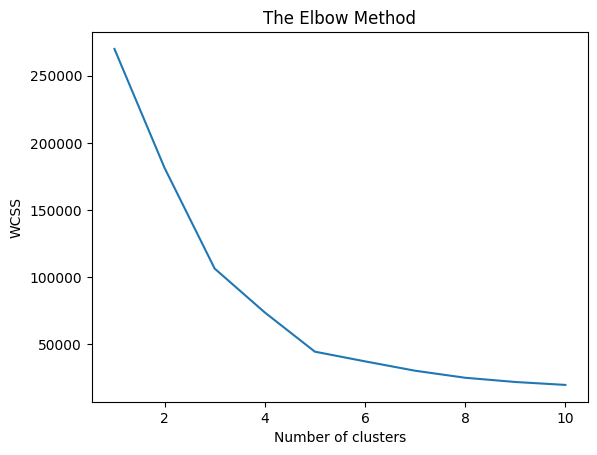

In [ ]:
# Metodo del Codo para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11) y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 5, por lo que, para este caso práctico, el número óptimo de clusters será de 5.



In [ ]:
# Creando el k-Means para los 5 grupos encontrados
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
# k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [ ]:
dataset['pred']=y_kmeans
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),pred
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [ ]:
dataset.groupby(['pred']).count()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
pred,,,,,
0,35,35,35,35,35
1,81,81,81,81,81
2,22,22,22,22,22
3,10,10,10,10,10
4,23,23,23,23,23
5,29,29,29,29,29


Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters realizamos lo siguiente, le asignamos un color a cada grupo y marcamos los centroides en amarillo:

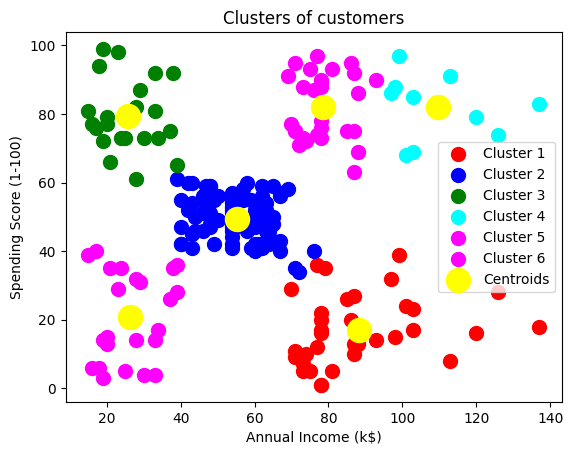

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'magenta', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **DBSCAN - Ejemplo 1**
Creamos un dataset con el método make_moons.

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
plt.style.use('ggplot')

<ipython-input-13-f7cd1f5fe03d>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9, cmap=plt.cm.Set1)


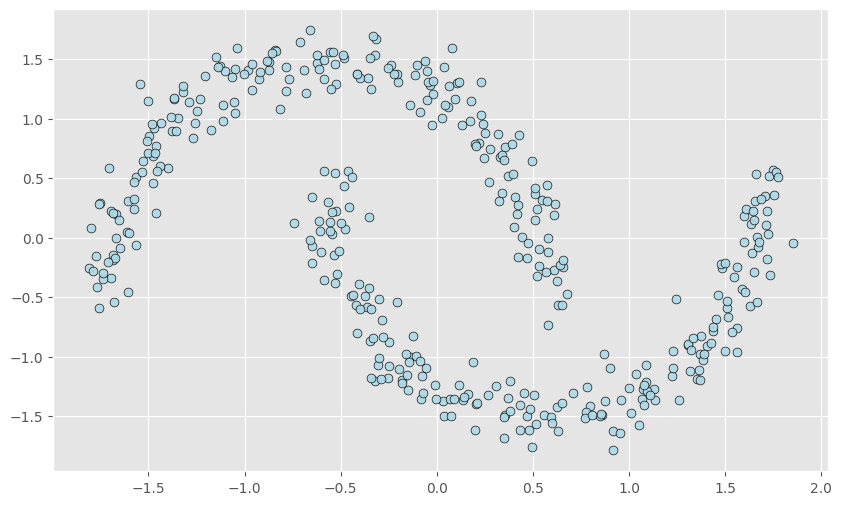

In [ ]:
from sklearn.datasets import make_moons

X, label = make_moons(n_samples=400, noise=0.07, random_state=19)
X= StandardScaler().fit_transform(X)

fig, ax = plt.subplots(figsize=(10,6))
sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9, cmap=plt.cm.Set1)

El método DBSCAN implementa el modelo. Y tiene un método fit_predict para calcular los clusters sobre los datos.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.20, min_samples=4)
y_pred = dbscan.fit_predict(X)

Vamos a graficar los dos clusters y los outliers.

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

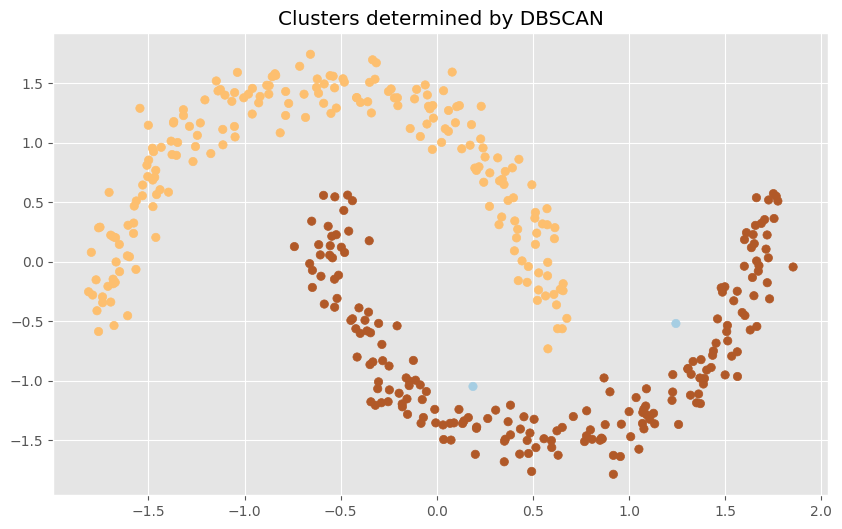

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Similar a los otros modelos de clusters, podemos acceder al número de cluster de cada observación con la función labels_.

En DBSCAN, los puntos marcados con  −1  son outliers.

In [ ]:
dbscan.labels_[dbscan.labels_ == -1].size

2

# **DBSCAN - Ejemplo 2**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
# Configuracion de datos y parametros
num_samples_total = 1000;cluster_centers = [(3,3), (7,7)]

In [ ]:
num_classes = len(cluster_centers)
epsilon = 1.0;min_samples = 13
# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

In [ ]:
num_classes = len(cluster_centers)
epsilon = 1.0; min_samples = 13
# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)

In [ ]:
labels = db.labels_
labels

array([ 0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,
        1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,
        0,  1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  1,  0

In [ ]:
np.unique(labels)

array([-1,  0,  1])

In [ ]:
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

#. clusters estimado: 3
# puntos ruidosos: 1


#. clusters estimado: 3
# puntos ruidosos: 1


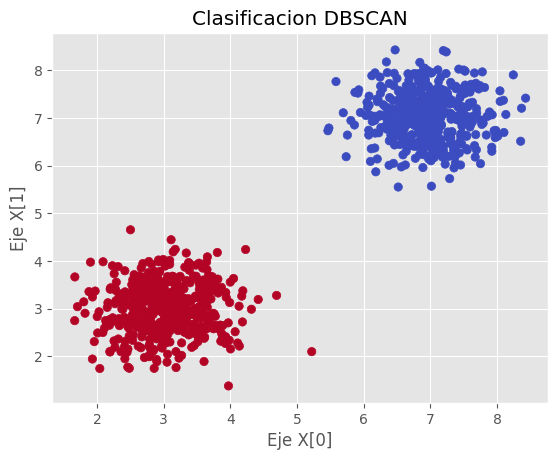

In [ ]:
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()